In [2]:
from astropy.table import Table, join, Column
from astropy import units as u
import astropy.coordinates as coord
from astropy.coordinates import SkyCoord
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# %config InlineBackend.figure_format = "svg"

# My modules
from cross_match import pos_max_calc, postional_difference_calc
from declination_smoothed import dec_smoothed_pos_max
from my_progs.catalog.read_gaia import read_gaiadr2_qso

In [3]:
# Read ICRF3 S/X catalog
icrf3_sx = Table.read("../data/icrf3sx.txt",
                      format="ascii.fixed_width", data_start=16,
                      names=["icrf_name", "iers_name_sx", "type_sx",
                             "ra_err_sx", "dec_err_sx", "ra_dec_corr_sx",
                             "mean_obs_sx", "beg_obs_sx", "end_obs_sx", "nb_sess_sx", "nb_del_sx"],
                      col_starts=[5, 25, 35, 83, 98,
                                  108, 118, 127, 136, 145, 150],
                      col_ends=[20, 32, 35, 92, 106, 114, 124, 133, 142, 148, 155])

# Position information
ra_dec = Table.read("../data/icrf3sx.txt",
                    format="ascii.fixed_width", data_start=16,
                    names=["ra_dec"], col_starts=[40], col_ends=[77])

ra_dec_sx = SkyCoord(ra_dec["ra_dec"], unit=(u.hourangle, u.deg))
ra_sx = Column(ra_dec_sx.ra, name="ra_sx")
dec_sx = Column(ra_dec_sx.dec, name="dec_sx")

# Add source position to the table
icrf3_sx.add_columns([ra_sx, dec_sx], indexes=[3, 3])

# Add unit information
icrf3_sx["ra_err_sx"] = icrf3_sx["ra_err_sx"] * 15e3 * np.cos(ra_dec_sx.dec.rad)
icrf3_sx["ra_err_sx"].unit = u.mas
icrf3_sx["dec_err_sx"].unit = u.arcsec
icrf3_sx["dec_err_sx"] = icrf3_sx["dec_err_sx"].to(u.mas)

# Calculate the semi-major axis of error ellipse
pos_err_sx = pos_max_calc(icrf3_sx["ra_err_sx"], icrf3_sx["dec_err_sx"], icrf3_sx["ra_dec_corr_sx"])

# Add the semi-major axis of error ellipse to the table
icrf3_sx.add_column(pos_err_sx, name="pos_err_sx", index=9)


In [4]:
# Read ICRF3 K catalog
icrf3_k = Table.read("../data/icrf3k.txt",
                      format="ascii.fixed_width", data_start=16,
                      names=["icrf_name", "iers_name_k", "type_k",
                             "ra_err_k", "dec_err_k", "ra_dec_corr_k",
                             "mean_obs_k", "beg_obs_k", "end_obs_k", "nb_sess_k", "nb_del_k"],
                      col_starts=[5, 25, 35, 83, 98,
                                  108, 118, 127, 136, 145, 150],
                      col_ends=[20, 32, 35, 92, 106, 114, 124, 133, 142, 148, 155])

# Position information
ra_dec = Table.read("../data/icrf3k.txt",
                    format="ascii.fixed_width", data_start=16,
                    names=["ra_dec"], col_starts=[40], col_ends=[77])

ra_dec_k = SkyCoord(ra_dec["ra_dec"], unit=(u.hourangle, u.deg))
ra_k = Column(ra_dec_k.ra, name="ra_k")
dec_k = Column(ra_dec_k.dec, name="dec_k")

# Add source position to the table
icrf3_k.add_columns([ra_k, dec_k], indexes=[3, 3])

# Add unit information
icrf3_k["ra_err_k"] = icrf3_k["ra_err_k"] * 15e3 * np.cos(ra_dec_k.dec.rad)
icrf3_k["ra_err_k"].unit = u.mas
icrf3_k["dec_err_k"].unit = u.arcsec
icrf3_k["dec_err_k"] = icrf3_k["dec_err_k"].to(u.mas)

# Calculate the semi-major axis of error ellipse
pos_err_k = pos_max_calc(icrf3_k["ra_err_k"], icrf3_k["dec_err_k"], icrf3_k["ra_dec_corr_k"])

# Add the semi-major axis of error ellipse to the table
icrf3_k.add_column(pos_err_k, name="pos_err_k", index=9)
icrf3_k["pos_err_k"].unit = u.mas


In [5]:
# Read ICRF3 X/Ka catalog
icrf3_xka = Table.read("../data/icrf3xka.txt",
                       format="ascii.fixed_width", data_start=16,
                       names=["icrf_name", "iers_name_xka", "type_xka",
                              "ra_err_xka", "dec_err_xka", "ra_dec_corr_xka",
                              "mean_obs_xka", "beg_obs_xka", "end_obs_xka", "nb_sess_xka", "nb_del_xka"],
                       col_starts=[5, 25, 35, 83, 98,
                                   108, 118, 127, 136, 145, 150],
                       col_ends=[20, 32, 35, 92, 106, 114, 124, 133, 142, 148, 155])

# Position information
ra_dec = Table.read("../data/icrf3xka.txt",
                    format="ascii.fixed_width", data_start=16,
                    names=["ra_dec"], col_starts=[40], col_ends=[77])

ra_dec_xka = SkyCoord(ra_dec["ra_dec"], unit=(u.hourangle, u.deg))
ra_xka = Column(ra_dec_xka.ra, name="ra_xka")
dec_xka = Column(ra_dec_xka.dec, name="dec_xka")

# Add source position to the table
icrf3_xka.add_columns([ra_xka, dec_xka], indexes=[3, 3])

# Add unit information
icrf3_xka["ra_err_xka"] = icrf3_xka["ra_err_xka"] * \
    15e3 * np.cos(ra_dec_xka.dec.rad)
icrf3_xka["ra_err_xka"].unit = u.mas
icrf3_xka["dec_err_xka"].unit = u.arcsec
icrf3_xka["dec_err_xka"] = icrf3_xka["dec_err_xka"].to(u.mas)

# Calculate the semi-major axis of error ellipse
pos_err_xka = pos_max_calc(icrf3_xka["ra_err_xka"], icrf3_xka["dec_err_xka"], icrf3_xka["ra_dec_corr_xka"])

# Add the semi-major axis of error ellipse to the table
icrf3_xka.add_column(pos_err_xka, name="pos_err_xka", index=9)
icrf3_xka["pos_err_xka"].unit = u.mas


In [6]:
# Read ICRF1 catalog
icrf1 = Table.read("../data/rsc95r01.dat",
                   format="ascii.fixed_width_no_header",
                   names=["icrf_name", "iers_name_icrf1", "type_icrf1",
                          "si_s_icrf1", "si_x_icrf1",
                          "ra_err_icrf1", "dec_err_icrf1", "ra_dec_corr_icrf1",
                          "mean_obs_icrf1", "beg_obs_icrf1", "end_obs_icrf1", "nb_sess_icrf1", "nb_del_icrf1"],
                   col_starts=[5, 24, 34, 35, 37, 77, 87,
                               96, 102, 112, 122, 132, 138],
                   col_ends=[21, 32, 34, 35, 37, 84, 93,
                             100, 110, 120, 130, 136, 143])


# Position information
ra_dec = Table.read("../data/rsc95r01.dat",
                    format="ascii.fixed_width_no_header",
                    names=["ra_dec"], col_starts=[42], col_ends=[73])

ra_dec_icrf1 = SkyCoord(ra_dec["ra_dec"], unit=(u.hourangle, u.deg))
ra_icrf1 = Column(ra_dec_icrf1.ra, name="ra_icrf1")
dec_icrf1 = Column(ra_dec_icrf1.dec, name="dec_icrf1")

# Add source position to the table
icrf1.add_columns([ra_icrf1, dec_icrf1], indexes=[3, 3])

# Add unit information
icrf1["ra_err_icrf1"] = icrf1["ra_err_icrf1"] * \
    15e3 * np.cos(ra_dec_icrf1.dec.rad)
icrf1["ra_err_icrf1"].unit = u.mas
icrf1["dec_err_icrf1"].unit = u.arcsec
icrf1["dec_err_icrf1"] = icrf1["dec_err_icrf1"].to(u.mas)

# Calculate the semi-major axis of error ellipse
pos_err_icrf1 = pos_max_calc(
    icrf1["ra_err_icrf1"], icrf1["dec_err_icrf1"], icrf1["ra_dec_corr_icrf1"].filled())

# Add the semi-major axis of error ellipse to the table
icrf1.add_column(pos_err_icrf1, name="pos_err_icrf1", index=9)
icrf1["pos_err_icrf1"].unit = u.mas

In [7]:
# Read ICRF2 catalog
icrf2 = Table.read("../data/icrf2.dat",
                   format="ascii.fixed_width_no_header",
                   names=["icrf_name", "ivs_name_icrf2", "iers_name_icrf2", "type_icrf2",
                          "ra_err_icrf2", "dec_err_icrf2", "ra_dec_corr_icrf2",
                          "mean_obs_icrf2", "beg_obs_icrf2", "end_obs_icrf2", "nb_sess_icrf2", "nb_del_icrf2"],
                   col_starts=[0, 17, 25, 35, 73, 84,
                               94, 101, 109, 117, 125, 130],
                   col_ends=[15, 24, 33, 35, 82, 92, 99, 107, 115, 123, 128, 135])

# Position information
ra_dec = Table.read("../data/icrf2.dat",
                    format="ascii.fixed_width_no_header",
                    names=["ra_dec"], col_starts=[37], col_ends=[71])

ra_dec_icrf2 = SkyCoord(ra_dec["ra_dec"], unit=(u.hourangle, u.deg))
ra_icrf2 = Column(ra_dec_icrf2.ra, name="ra_icrf2")
dec_icrf2 = Column(ra_dec_icrf2.dec, name="dec_icrf2")

# Add source position to the table
icrf2.add_columns([ra_icrf2, dec_icrf2], indexes=[3, 3])

# Add unit information
icrf2["ra_err_icrf2"] = icrf2["ra_err_icrf2"] * \
    15e3 * np.cos(ra_dec_icrf2.dec.rad)
icrf2["ra_err_icrf2"].unit = u.mas
icrf2["dec_err_icrf2"].unit = u.arcsec
icrf2["dec_err_icrf2"] = icrf2["dec_err_icrf2"].to(u.mas)

# Calculate the semi-major axis of error ellipse
pos_err_icrf2 = pos_max_calc(
    icrf2["ra_err_icrf2"], icrf2["dec_err_icrf2"], icrf2["ra_dec_corr_icrf2"])

# Add the semi-major axis of error ellipse to the table
icrf2.add_column(pos_err_icrf2, name="pos_err_icrf2", index=9)
icrf2["pos_err_icrf2"].unit = u.mas

In [8]:
# Read Gaia DR2 IERS quasar data
gaiadr2 = read_gaiadr2_qso()
gaiadr2.colnames

['iers_name',
 'source_id',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'pos_err',
 'parallax',
 'parallax_error',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'phot_g_mean_mag',
 'phot_bp_mean_mag',
 'phot_rp_mean_mag']

In [9]:
# Compare the formal error in terms of the median.
# All sources
med_ra_all = [np.median(icrf1["ra_err_icrf1"].filled()),
              np.median(icrf2["ra_err_icrf2"]),
              np.median(icrf3_sx["ra_err_sx"].filled()),
              np.median(icrf3_k["ra_err_k"].filled()),
              np.median(icrf3_xka["ra_err_xka"].filled())]
med_dec_all = [np.median(icrf1["dec_err_icrf1"].filled()),
               np.median(icrf2["dec_err_icrf2"]),
               np.median(icrf3_sx["dec_err_sx"].filled()),
               np.median(icrf3_k["dec_err_k"].filled()),
               np.median(icrf3_xka["dec_err_xka"].filled())]
med_pos_all = [np.median(icrf1["pos_err_icrf1"].filled()),
               np.median(icrf2["pos_err_icrf2"]),
               np.median(icrf3_sx["pos_err_sx"].filled()),
               np.median(icrf3_k["pos_err_k"].filled()),
               np.median(icrf3_xka["pos_err_xka"].filled())]

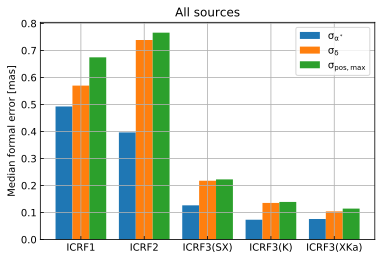

In [10]:
# Plot the median formal error for All sources
names = ["ICRF1", "ICRF2", "ICRF3(SX)", "ICRF3(K)", "ICRF3(XKa)"]

pos = np.arange(len(names)) + 1
width = 0.8 / 3

fig, ax = plt.subplots()
ax.bar(pos - width, med_ra_all, width=width, label="$\mathrm{\sigma_{\\alpha^*}}$")
ax.bar(pos, med_dec_all, width=width, label="$\mathrm{\sigma_{\\delta}}$")
ax.bar(pos + width, med_pos_all, width=width, label="$\mathrm{\sigma_{pos,max}}$")

ax.set_xticks(pos)
ax.set_xticklabels(names)

ax.set_ylabel("Median formal error [mas]")

ax.set_title("All sources")

ax.legend()
ax.grid()

plt.savefig("../plots/icrf_med_formal_error.png")

In [11]:
# Smooth the formal errors of catalogs
bin_size = 50

# ICRF1
dec_icrf1, ra_err_icrf1 = dec_smoothed_pos_max(
    icrf1["dec_icrf1"].filled(), icrf1["ra_err_icrf1"].filled(), bin_size)
dec_icrf1, dec_err_icrf1 = dec_smoothed_pos_max(
    icrf1["dec_icrf1"].filled(), icrf1["dec_err_icrf1"].filled(), bin_size)
dec_icrf1, pos_err_icrf1 = dec_smoothed_pos_max(
    icrf1["dec_icrf1"].filled(), icrf1["pos_err_icrf1"].filled(), bin_size)

# ICRF2
dec_icrf2, ra_err_icrf2 = dec_smoothed_pos_max(
    icrf2["dec_icrf2"], icrf2["ra_err_icrf2"], bin_size)
dec_icrf2, dec_err_icrf2 = dec_smoothed_pos_max(
    icrf2["dec_icrf2"], icrf2["dec_err_icrf2"], bin_size)
dec_icrf2, pos_err_icrf2 = dec_smoothed_pos_max(
    icrf2["dec_icrf2"], icrf2["pos_err_icrf2"], bin_size)

# ICRF3(SX)
dec_sx, ra_err_sx = dec_smoothed_pos_max(
    icrf3_sx["dec_sx"].filled(), icrf3_sx["ra_err_sx"].filled(), bin_size)
dec_sx, dec_err_sx = dec_smoothed_pos_max(
    icrf3_sx["dec_sx"].filled(), icrf3_sx["dec_err_sx"].filled(), bin_size)
dec_sx, pos_err_sx = dec_smoothed_pos_max(
    icrf3_sx["dec_sx"].filled(), icrf3_sx["pos_err_sx"].filled(), bin_size)

# ICRF3(K)
dec_k, ra_err_k = dec_smoothed_pos_max(
    icrf3_k["dec_k"].filled(), icrf3_k["ra_err_k"].filled(), bin_size)
dec_k, dec_err_k = dec_smoothed_pos_max(
    icrf3_k["dec_k"].filled(), icrf3_k["dec_err_k"].filled(), bin_size)
dec_k, pos_err_k = dec_smoothed_pos_max(
    icrf3_k["dec_k"].filled(), icrf3_k["pos_err_k"].filled(), bin_size)

# ICRF3(XKa)
dec_xka, ra_err_xka = dec_smoothed_pos_max(
    icrf3_xka["dec_xka"].filled(), icrf3_xka["ra_err_xka"].filled(), bin_size)
dec_xka, dec_err_xka = dec_smoothed_pos_max(
    icrf3_xka["dec_xka"].filled(), icrf3_xka["dec_err_xka"].filled(), bin_size)
dec_xka, pos_err_xka = dec_smoothed_pos_max(
    icrf3_xka["dec_xka"].filled(), icrf3_xka["pos_err_xka"].filled(), bin_size)


In [12]:
# Plot the smoothed positional formal error
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, figsize=(10, 4))

ax0.plot(dec_icrf1, ra_err_icrf1, "g.", ms=2, label="ICRF1")
ax0.plot(dec_icrf2, ra_err_icrf2, "m.", ms=2, label="ICRF2")
ax0.plot(dec_sx, ra_err_sx, "r.", ms=2, label="ICRF3(SX)")
ax0.plot(dec_k, ra_err_k, "y.", ms=2, label="ICRF3(K)")
ax0.plot(dec_xka, ra_err_xka, "b.", ms=2, label="ICRF3(XKa)")

ax0.set_xlim([-90, 90])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_xlabel("Declination [$\circ$]")
ax0.set_yscale("log")
ax0.set_ylabel("Formal error in $\\alpha^*$ [mas]")
ax0.grid()  
# ax0.legend(fontsize="small")

ax1.plot(dec_icrf1, dec_err_icrf1, "g.", ms=2, label="ICRF1")
ax1.plot(dec_icrf2, dec_err_icrf2, "m.", ms=2, label="ICRF2")
ax1.plot(dec_sx, dec_err_sx, "r.", ms=2, label="ICRF3(SX)")
ax1.plot(dec_k, dec_err_k, "y.", ms=2, label="ICRF3(K)")
ax1.plot(dec_xka, dec_err_xka, "b.", ms=2, label="ICRF3(XKa)")

ax1.set_xlabel("Declination [$\circ$]")
ax1.set_yscale("log")
ax1.set_ylabel("Formal error in $\delta$ [mas]")
ax1.grid()  
ax1.legend(fontsize="small")

fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

plt.savefig("../plots/icrf_formal_error.png")

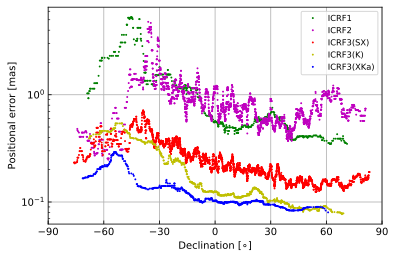

In [13]:
# Plot the smoothed positional formal error
fig, ax = plt.subplots()

ax.plot(dec_icrf1, pos_err_icrf1, "g.", ms=2, label="ICRF1")
ax.plot(dec_icrf2, pos_err_icrf2, "m.", ms=2, label="ICRF2")
ax.plot(dec_sx, pos_err_sx, "r.", ms=2, label="ICRF3(SX)")
ax.plot(dec_k, pos_err_k, "y.", ms=2, label="ICRF3(K)")
ax.plot(dec_xka, pos_err_xka, "b.", ms=2, label="ICRF3(XKa)")

ax.set_xlim([-90, 90])
ax.set_xticks(np.arange(-90, 91, 30))
ax.set_xlabel("Declination [$\circ$]")
ax.set_yscale("log")
ax.set_ylabel("Positional error [mas]")
ax.grid()  
ax.legend(fontsize="small")

plt.savefig("../plots/icrf_pos_err.png")

In [14]:
# Compare the formal error in terms of the median.
# All sources
med_ra_all1 = [np.median(icrf1["ra_err_icrf1"].filled()),
               np.median(icrf2["ra_err_icrf2"]),
               np.median(icrf3_sx["ra_err_sx"].filled()),
               np.median(icrf3_k["ra_err_k"].filled()),
               np.median(icrf3_xka["ra_err_xka"].filled()),
               np.median(gaiadr2["ra_error"].filled())]
med_dec_all1 = [np.median(icrf1["dec_err_icrf1"].filled()),
                np.median(icrf2["dec_err_icrf2"]),
                np.median(icrf3_sx["dec_err_sx"].filled()),
                np.median(icrf3_k["dec_err_k"].filled()),
                np.median(icrf3_xka["dec_err_xka"].filled()),
                np.median(gaiadr2["dec_error"].filled())]
med_pos_all1 = [np.median(icrf1["pos_err_icrf1"].filled()),
                np.median(icrf2["pos_err_icrf2"]),
                np.median(icrf3_sx["pos_err_sx"].filled()),
                np.median(icrf3_k["pos_err_k"].filled()),
                np.median(icrf3_xka["pos_err_xka"].filled()),
                np.median(gaiadr2["pos_err"].filled())]

In [15]:
# Gaia DR2
dec_gdr2, ra_err_gdr2 = dec_smoothed_pos_max(
    gaiadr2["dec"].filled(), gaiadr2["ra_error"].filled(), bin_size)
dec_gdr2, dec_err_gdr2 = dec_smoothed_pos_max(
    gaiadr2["dec"].filled(), gaiadr2["dec_error"].filled(), bin_size)
dec_gdr2, pos_err_gdr2 = dec_smoothed_pos_max(
    gaiadr2["dec"].filled(), gaiadr2["pos_err"].filled(), bin_size)


In [21]:
# Plot the smoothed positional formal error
fig, (ax0, ax1) = plt.subplots(ncols=2, sharex=True, figsize=(10, 4))

ax0.plot(dec_icrf1, ra_err_icrf1, "g.", ms=2, label="ICRF1")
ax0.plot(dec_icrf2, ra_err_icrf2, "m.", ms=2, label="ICRF2")
ax0.plot(dec_sx, ra_err_sx, "r.", ms=2, label="ICRF3(SX)")
ax0.plot(dec_k, ra_err_k, "y.", ms=2, label="ICRF3(K)")
ax0.plot(dec_xka, ra_err_xka, "b.", ms=2, label="ICRF3(XKa)")
ax0.plot(dec_gdr2, ra_err_gdr2, "k.", ms=2, label="Gaia DR2")

ax0.set_xlim([-90, 90])
ax0.set_xticks(np.arange(-90, 91, 30))
ax0.set_ylim([0, 2])
ax0.set_xlabel("Declination [$\circ$]")
# ax0.set_yscale("log")
ax0.set_ylabel("Formal error in $\\alpha^*$ [mas]")
ax0.grid()  
# ax0.legend(fontsize="small")

ax1.plot(dec_icrf1, dec_err_icrf1, "g.", ms=2, label="ICRF1")
ax1.plot(dec_icrf2, dec_err_icrf2, "m.", ms=2, label="ICRF2")
ax1.plot(dec_sx, dec_err_sx, "r.", ms=2, label="ICRF3(SX)")
ax1.plot(dec_k, dec_err_k, "y.", ms=2, label="ICRF3(K)")
ax1.plot(dec_xka, dec_err_xka, "b.", ms=2, label="ICRF3(XKa)")
ax1.plot(dec_gdr2, dec_err_gdr2, "k.", ms=2, label="Gaia DR2")

ax1.set_xlabel("Declination [$\circ$]")
# ax1.set_yscale("log")
ax1.set_ylim([0, 3])
ax1.set_ylabel("Formal error in $\delta$ [mas]")
ax1.grid()  
ax1.legend(fontsize="small")

fig.tight_layout()
plt.subplots_adjust(wspace=0.2)

# plt.savefig("../plots/icrf_formal_error1.png")

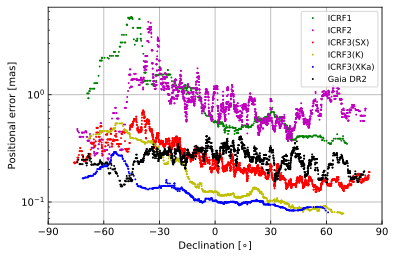

In [22]:
# Plot the smoothed positional formal error
fig, ax = plt.subplots()

ax.plot(dec_icrf1, pos_err_icrf1, "g.", ms=2, label="ICRF1")
ax.plot(dec_icrf2, pos_err_icrf2, "m.", ms=2, label="ICRF2")
ax.plot(dec_sx, pos_err_sx, "r.", ms=2, label="ICRF3(SX)")
ax.plot(dec_k, pos_err_k, "y.", ms=2, label="ICRF3(K)")
ax.plot(dec_xka, pos_err_xka, "b.", ms=2, label="ICRF3(XKa)")
ax.plot(dec_gdr2, pos_err_gdr2, "k.", ms=2, label="Gaia DR2")

ax.set_xlim([-90, 90])
ax.set_xticks(np.arange(-90, 91, 30))
ax.set_xlabel("Declination [$\circ$]")
ax.set_yscale("log")
ax.set_ylabel("Positional error [mas]")
ax.grid()  
ax.legend(fontsize="small")

# plt.savefig("../plots/icrf_pos_err1.png")